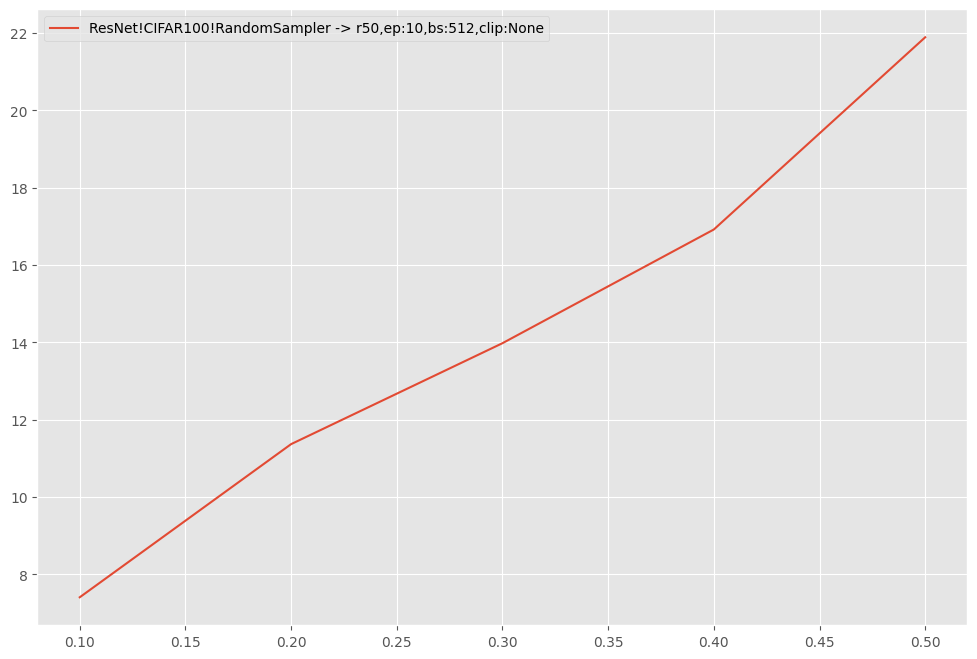

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(12,8))

def gather_stats(experiment_path):
    df = None

    for dir_name in os.listdir(experiment_path):
        if dir_name == ".DS_Store": continue
        
        dir_path = os.path.join(experiment_path, dir_name)
        runid = int(dir_name)
        
        try:
            with open(os.path.join(dir_path, 'acc.txt'), 'r') as f:
                acc = float(f.read().strip()[:-1])

            with open(os.path.join(dir_path, 'ratio.txt'), 'r') as f:
                ratio = float(f.read().strip()[:-1])

            with open(os.path.join(dir_path, 'train_size.txt'), 'r') as f:
                train_size = float(f.read().strip()[:-1])

            with open(os.path.join(dir_path, 'valid_size.txt'), 'r') as f:
                valid_size = float(f.read().strip()[:-1])

            with open(os.path.join(dir_path, 'test_size.txt'), 'r') as f:
                test_size = float(f.read().strip()[:-1])

            if df is None:
                df = pd.DataFrame({
                    'runid': [runid],
                    'acc': [acc],
                    'ratio': [ratio],
                    'train_size': [train_size],
                    'valid_size': [valid_size],
                    'test_size': [test_size]
                })
            else:
                df = pd.concat((df, pd.DataFrame({
                    'runid': [runid],
                    'acc': [acc],
                    'ratio': [ratio],
                    'train_size': [train_size],
                    'valid_size': [valid_size],
                    'test_size': [test_size]
                })))
        except:
            pass

    return df

for experiment in os.listdir("../experiments"):
    if not experiment.startswith("ResNet!CIFAR100!"): continue
    if experiment == ".DS_Store": continue
    if experiment == ".gitkeep": continue
    
    for run in os.listdir(os.path.join("../experiments", experiment)):
        if not "clip:None" in run: continue
        if run == ".DS_Store": continue
        if run == ".gitkeep": continue
        
        path = os.path.join("../experiments", experiment, run)
        
        df = gather_stats(path)
        df = df.sort_values(by='runid')
        
        plt.plot(df['ratio'], df['acc'], label=f"{experiment} -> {run}")
        
plt.legend()
plt.show()